In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
file = '1M_one_res_small_no_leaks_rand_bd_merged.csv'

dataframe = pd.read_csv("./dataset/" + file , sep=',')

In [14]:
#DATA CLEANING, elimina gli attributi nulli e irrilevanti (tipo hasleak che è sempre false)
dataframe.drop(columns=['leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'tot_leaks_demand', 'has_leak'], inplace=True)

#elimina la colonna 'hour' in quanto considereremo una sola osservazione per nodo, le osservazioni non saranno distinte per ore
dataframe.drop(columns=['hour'], inplace=True)

print("Dataframe prima dell'aggregazione")
display(dataframe)

#AGGREGAZIONE DEI DATI
# Seleziona le colonne numeriche
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns.tolist()

# Colonne per il raggruppamento
grouping_columns = ['nodeID', 'node_type']

# Calcola la media delle colonne numeriche, mantenendo 'node_type'
dataframe = dataframe.groupby(grouping_columns)[numeric_columns].mean().reset_index()

# Visualizza il nuovo DataFrame
print("Dataframe dopo l'aggregazione")
display(dataframe)

Dataframe prima dell'aggregazione


,nodeID,base_demand,demand_value,head_value,pressure_value,x_pos,y_pos,node_type,tot_junctions_demand,tot_network_demand
0,4922,0.006040,0.006040,55.931300,39.167300,494117.01,1376679.17,Junction,0.006040,0.006040
1,5656,0.004547,0.004547,55.931278,39.167278,494110.13,1376302.88,Junction,0.010587,0.010587
2,8596,0.005016,0.005016,55.676176,37.430848,494155.35,1379384.78,Junction,0.015603,0.015603
3,8598,0.006176,0.006176,54.622440,35.426136,494320.25,1379386.96,Junction,0.021779,0.021779
4,8600,0.005701,0.005701,53.582899,34.532899,494495.39,1379463.39,Junction,0.027480,0.027480
...,...,...,...,...,...,...,...,...,...,...
55771,8792,0.006899,0.002156,22.983946,5.232394,500703.60,1377013.26,Junction,0.248834,0.248834
55772,9402,0.003179,0.003179,56.221259,39.457259,494025.60,1376678.69,Junction,0.252013,0.252013
55773,9410,0.007050,0.007050,56.147546,39.383546,494118.61,1376930.61,Junction,0.259063,0.259063
55774,J106,0.002073,0.002073,56.221778,39.671138,494000.44,1376678.87,Junction,0.261136,0.261136


Dataframe dopo l'aggregazione


,nodeID,node_type,base_demand,demand_value,head_value,pressure_value,x_pos,y_pos,tot_junctions_demand,tot_network_demand
0,4922,Junction,0.005046,0.005046,56.052966,39.288966,494117.01,1376679.17,0.005046,0.005046
1,5656,Junction,0.004791,0.004791,56.052935,39.288935,494110.13,1376302.88,0.009837,0.009837
2,7384,Reservoir,0.000000,-0.237096,56.067862,0.000000,493747.16,1377175.41,0.000000,0.000000
3,8596,Junction,0.004917,0.004917,55.810883,37.565555,494155.35,1379384.78,0.014754,0.014754
4,8598,Junction,0.005089,0.005089,54.803419,35.607115,494320.25,1379386.96,0.019843,0.019843
...,...,...,...,...,...,...,...,...,...,...
78,8746,Junction,0.005112,0.002077,23.331692,6.549404,500947.50,1378286.76,0.220313,0.220313
79,8792,Junction,0.004904,0.001738,23.544991,5.793439,500703.60,1377013.26,0.222051,0.222051
80,9402,Junction,0.005093,0.005093,56.054445,39.290445,494025.60,1376678.69,0.227145,0.227145
81,9410,Junction,0.004912,0.004912,55.995764,39.231764,494118.61,1376930.61,0.232056,0.232056


In [15]:
#NORMALIZZAZIONE
# Visualizza il DataFrame non normalizzato
print("DataFrame non normalizzato:")
display(dataframe)

# Crea un oggetto scaler
scaler = StandardScaler()

# Definisci le colonne da normalizzare
columns_to_normalize = [col for col in dataframe.columns if col not in ['x_pos', 'y_pos'] and dataframe[col].dtype in [np.float64, np.int64]]

# Normalizza le colonne numeriche
dataframe.loc[:, columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])

# Visualizza il DataFrame normalizzato
print("DataFrame Normalizzato:")
display(dataframe)

DataFrame non normalizzato:


,nodeID,node_type,base_demand,demand_value,head_value,pressure_value,x_pos,y_pos,tot_junctions_demand,tot_network_demand
0,4922,Junction,0.005046,0.005046,56.052966,39.288966,494117.01,1376679.17,0.005046,0.005046
1,5656,Junction,0.004791,0.004791,56.052935,39.288935,494110.13,1376302.88,0.009837,0.009837
2,7384,Reservoir,0.000000,-0.237096,56.067862,0.000000,493747.16,1377175.41,0.000000,0.000000
3,8596,Junction,0.004917,0.004917,55.810883,37.565555,494155.35,1379384.78,0.014754,0.014754
4,8598,Junction,0.005089,0.005089,54.803419,35.607115,494320.25,1379386.96,0.019843,0.019843
...,...,...,...,...,...,...,...,...,...,...
78,8746,Junction,0.005112,0.002077,23.331692,6.549404,500947.50,1378286.76,0.220313,0.220313
79,8792,Junction,0.004904,0.001738,23.544991,5.793439,500703.60,1377013.26,0.222051,0.222051
80,9402,Junction,0.005093,0.005093,56.054445,39.290445,494025.60,1376678.69,0.227145,0.227145
81,9410,Junction,0.004912,0.004912,55.995764,39.231764,494118.61,1376930.61,0.232056,0.232056


DataFrame Normalizzato:


,nodeID,node_type,base_demand,demand_value,head_value,pressure_value,x_pos,y_pos,tot_junctions_demand,tot_network_demand
0,4922,Junction,0.191298,0.192524,2.001247,2.177364,494117.01,1376679.17,-2.099026,-2.099026
1,5656,Junction,-0.269696,0.182775,2.001244,2.177361,494110.13,1376302.88,-2.022352,-2.022352
2,7384,Reservoir,-8.912215,-9.045456,2.002484,-1.139960,493747.16,1377175.41,-2.179789,-2.179789
3,8596,Junction,-0.041938,0.187591,1.981140,2.031849,494155.35,1379384.78,-1.943658,-1.943658
4,8598,Junction,0.268582,0.194158,1.897462,1.866490,494320.25,1379386.96,-1.862209,-1.862209
...,...,...,...,...,...,...,...,...,...,...
78,8746,Junction,0.309387,0.079230,-0.716523,-0.586968,500947.50,1378286.76,1.346168,1.346168
79,8792,Junction,-0.065576,0.066307,-0.698807,-0.650797,500703.60,1377013.26,1.373984,1.373984
80,9402,Junction,0.275585,0.194306,2.001370,2.177488,494025.60,1376678.69,1.455495,1.455495
81,9410,Junction,-0.051777,0.187383,1.996496,2.172534,494118.61,1376930.61,1.534102,1.534102


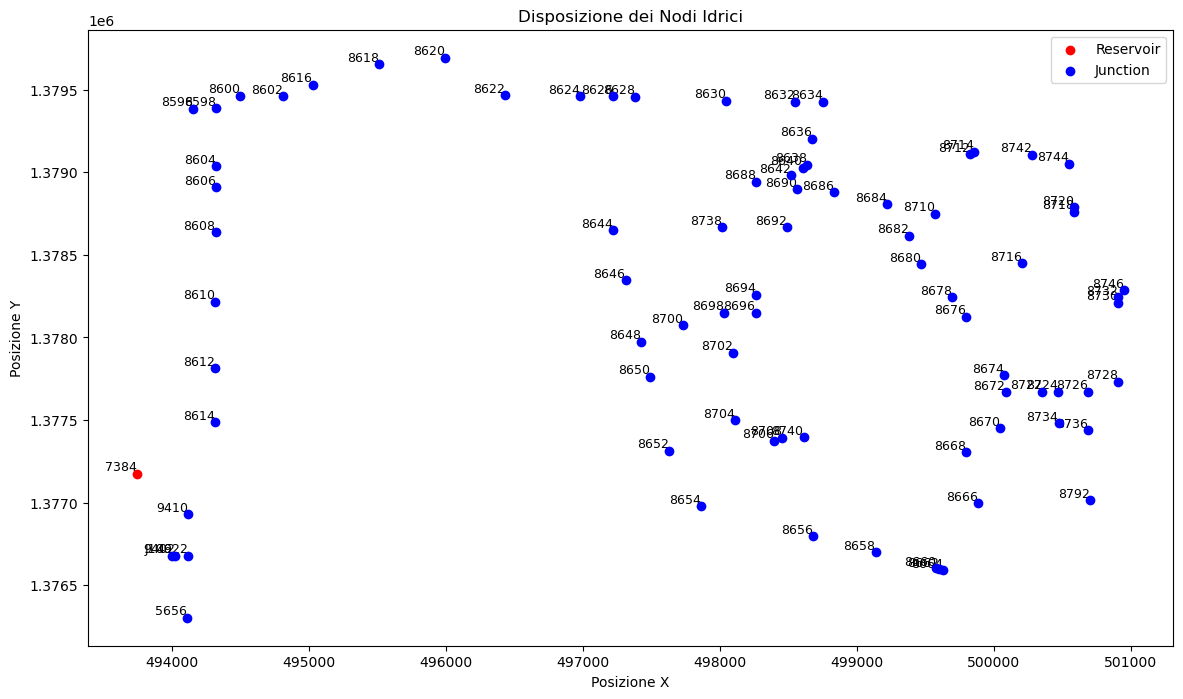

In [16]:
# Calcola la posizione media (o mediana) per ogni nodo
node_positions = dataframe.groupby(['nodeID', 'node_type'])[['x_pos', 'y_pos']].mean().reset_index()

# Dividi i dati in base al tipo di nodo
reservoirs = node_positions[node_positions['node_type'] == 'Reservoir']
junctions = node_positions[node_positions['node_type'] == 'Junction']

# Crea il grafico scatter
plt.figure(figsize=(14, 8))
plt.scatter(reservoirs['x_pos'], reservoirs['y_pos'], color='red', label='Reservoir', zorder=5)
plt.scatter(junctions['x_pos'], junctions['y_pos'], color='blue', label='Junction', zorder=5)

# Aggiungi le etichette dei nodi ai punti
for index, row in node_positions.iterrows():
    plt.text(row['x_pos'], row['y_pos'], str(row['nodeID']), fontsize=9, ha='right', va='bottom')

# Aggiungi titolo ed etichette
plt.title('Disposizione dei Nodi Idrici')
plt.xlabel('Posizione X')
plt.ylabel('Posizione Y')
plt.legend()  # Mostra la legenda

# Mostra il grafico
plt.show()


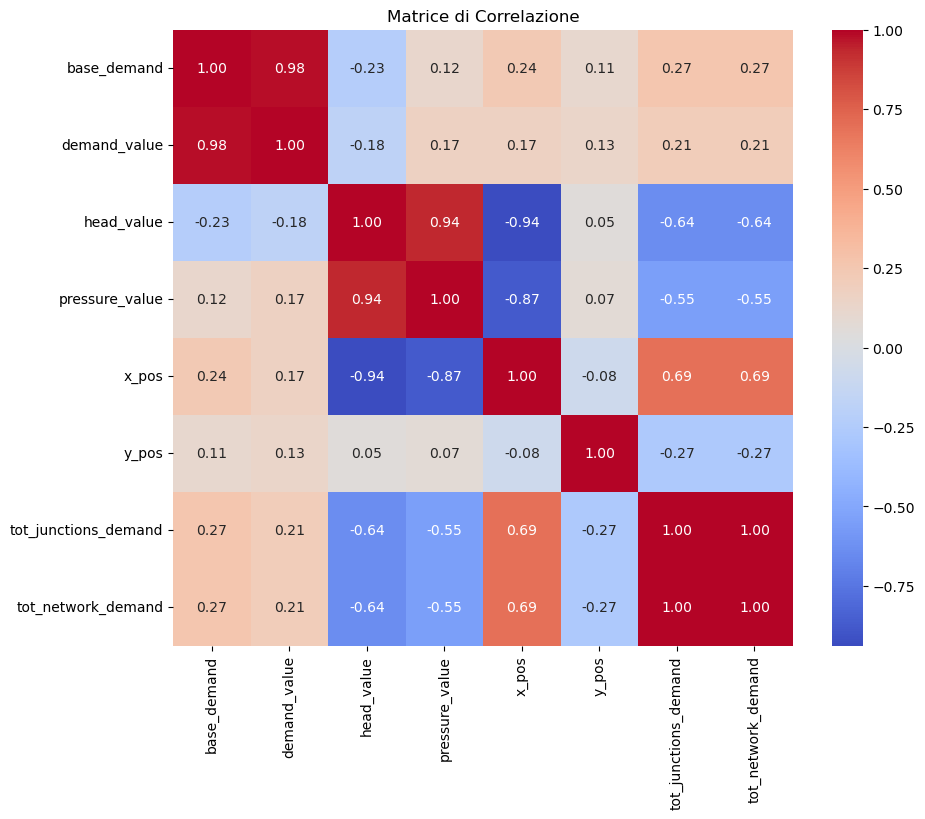

In [17]:
#HEATMAP 
# Seleziona solo colonne numeriche
numeric_dataframe = dataframe.select_dtypes(include=[np.number])

# Rimuovi colonne specifiche che non sono necessarie per la correlazione
selection_df = numeric_dataframe.drop(columns=[])

# Gestione dei valori nulli
selection_df = selection_df.dropna()

# Calcola la matrice di correlazione
correlation_matrix = selection_df.corr()

# Visualizzare la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

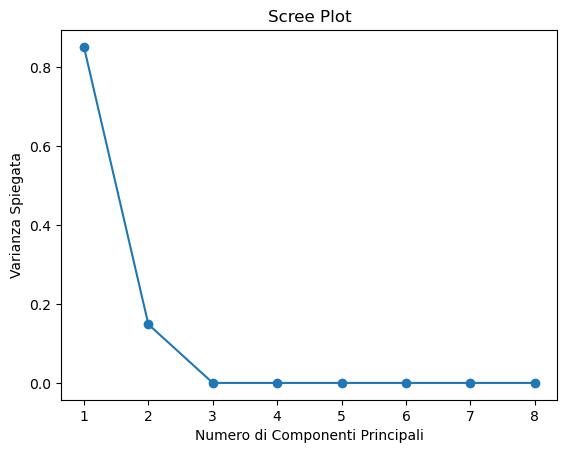

In [18]:
#PCA
# Selezioni esclusivamente le features numeriche
numeric_df = dataframe.select_dtypes(include=[np.number])

# Calcola gli autovalori e gli autovettori
pca = PCA()
pca.fit(numeric_df)
 
# Scree plot: varianza spiegata da ciascuna componente
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.title('Scree Plot')
plt.show()
 
# Scegli il numero di componenti in base al grafico o ad altri criteri
k = 3 
 
# Applica la PCA con il numero scelto di componenti
pca_final = PCA(n_components=k)
reduced_df = pca_final.fit_transform(numeric_df)
 
# Ora reduced_df contiene i dati ridotti con k componenti principali, dato che è un array numpy, è nevessario trasformarlo in un oggetto pandas
reduced_df = pd.DataFrame(reduced_df, columns=['PC1', 'PC2', 'PC3'])

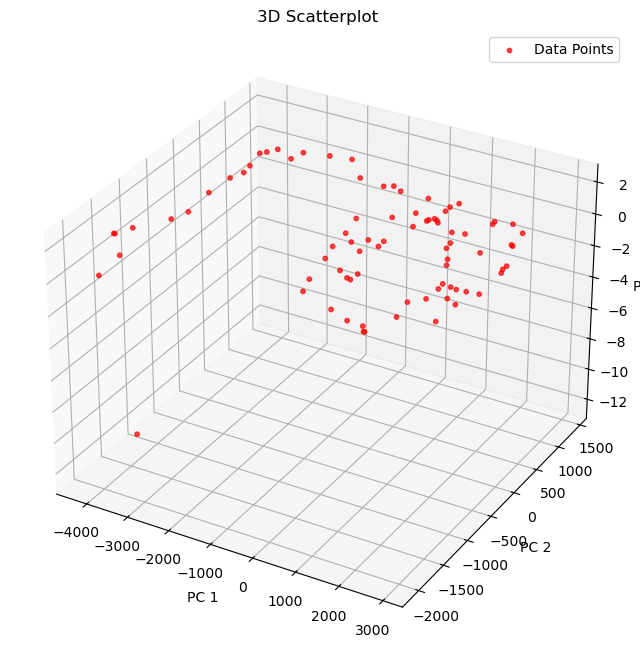

In [19]:
# Preparazione dei componenti (Vettori delle variabili)
components = pca_final.components_.T * np.sqrt(pca_final.explained_variance_)
scale_factor = np.abs(reduced_df).max() / np.abs(components).max()

# Crea il plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dei punti normalizzati
ax.scatter(reduced_df['PC1'], reduced_df['PC2'], reduced_df['PC3'],
           c='r', marker='o', alpha=0.7, label='Data Points', s=10)  # Aumenta la dimensione dei punti con 's'

# Impostazioni degli assi e del grafico
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D Scatterplot')
ax.legend()
plt.show()

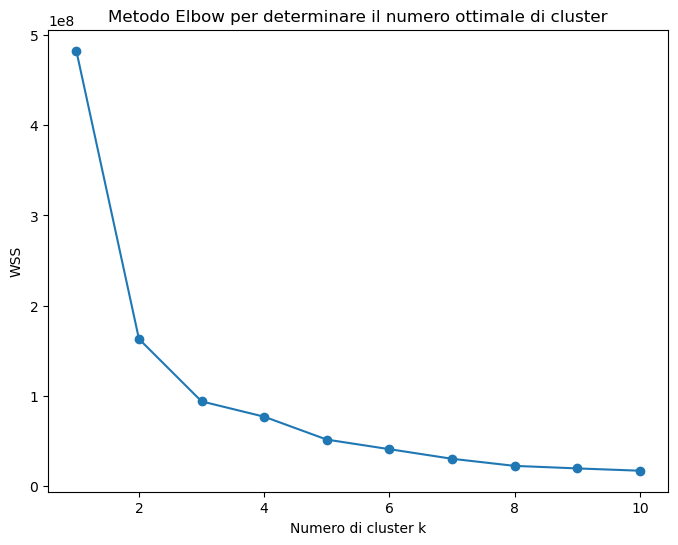

In [20]:
#ELBOW METHOD PER TROVARE IL K OTTIMO
wss = []
list_k = list(range(1, 11))  # Testiamo da 1 a 10 cluster

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(reduced_df)
    wss.append(km.inertia_)  # WSS per ogni n_clusters

# Plot WSS per ogni numero di cluster
plt.figure(figsize=(8, 6))
plt.plot(list_k, wss, '-o')
plt.xlabel('Numero di cluster k')
plt.ylabel('WSS')
plt.title('Metodo Elbow per determinare il numero ottimale di cluster')
plt.show()

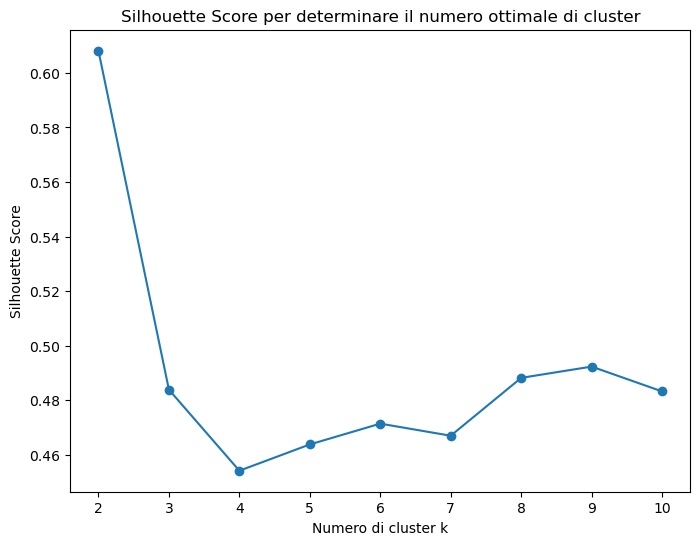

In [21]:
#SILHOUETTE SCORE
silhouette_scores = []
list_k = list(range(2, 11))  # Testiamo da 2 a 10 cluster (il silhouette non può essere calcolato con 1 solo cluster)

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    cluster_labels = km.fit_predict(reduced_df)
    silhouette_avg = silhouette_score(reduced_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)  # Memorizza il punteggio medio di silhouette per ogni k

# Plot Silhouette Scores per ogni numero di cluster
plt.figure(figsize=(8, 6))
plt.plot(list_k, silhouette_scores, '-o')
plt.xlabel('Numero di cluster k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per determinare il numero ottimale di cluster')
plt.show()

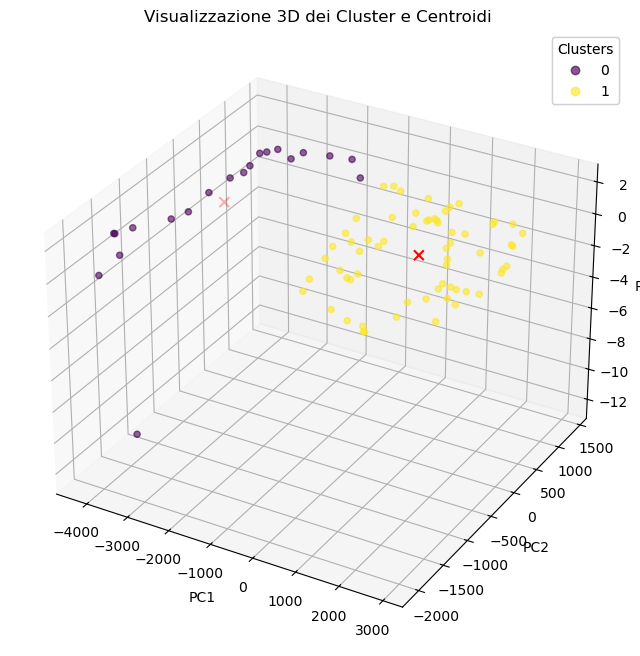

In [22]:
# Applicazione di K-Means con il numero ottimale di cluster
optimal_k = 2  # Sostituisci questo con il valore ottimale trovato
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_df)

# Aggiungi i cluster come colonna nel DataFrame
reduced_df['cluster'] = clusters

# Preparazione del plot 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dei punti con colorazione in base al cluster
scatter = ax.scatter(reduced_df['PC1'], reduced_df['PC2'], reduced_df['PC3'], c=clusters, cmap='viridis', marker='o', alpha=0.6)

# Plot dei centroidi
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=50, marker='x')

# Impostazioni degli assi
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizzazione 3D dei Cluster e Centroidi')

# Aggiunta della legenda
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)

plt.show()